In [1]:
# ---------------------- K-MEANS CLUSTERING (Simple Explanation) ----------------------
# K-Means is an unsupervised machine learning algorithm used to group similar data points
# into 'K' clusters. It works by assigning points to the nearest cluster center and then
# updating those centers repeatedly until the groups stabilize.

# ---------------------- 1. IMPORT REQUIRED LIBRARIES ----------------------

import pandas as pd                      # To load and work with datasets (tables of data)
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For plotting graphs and visualizing clusters
import seaborn as sns                    # For visually appealing statistical plots

from sklearn.cluster import KMeans       # The main K-Means clustering algorithm from sklearn
from sklearn.preprocessing import StandardScaler  # Used to scale data before clustering


In [2]:
# ---------------------- 2. LOAD THE DATASET ----------------------
# Replacing local path with Kaggle dataset link for public use:
# Kaggle Dataset: https://www.kaggle.com/datasets/shwetabh123/mall-customers

df = pd.read_excel("Mall_Customers.xlsx")   # Load the Mall Customers dataset
df.head()                                   # Display first 5 rows to understand structure


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [3]:
# ---------------------- 3. DATASET INFORMATION ----------------------
# df.info() shows column names, data types, and missing values.
# df.describe() shows basic statistics (mean, min, max, etc.) for numerical columns.

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# ---------------------- 4. SELECT FEATURES FOR CLUSTERING ----------------------
# We choose two features:
# - Annual Income
# - Spending Score
# These help K-Means group customers based on income vs. spending behavior.

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]   # Selecting key features
X.head()                                                    # Preview the s


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
# ---------------------- 5. FEATURE SCALING ----------------------
# K-Means works best when all features are on a similar scale.
# StandardScaler converts values so each feature has:
# - Mean = 0
# - Standard deviation = 1

scaler = StandardScaler()          # Create scaler object
X_scaled = scaler.fit_transform(X) # Fit to data and transform it


C:\Users\savij\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\savij\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\savij\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\savij\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

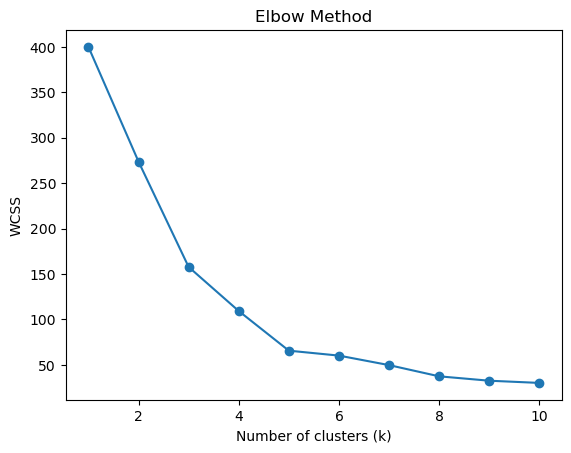

In [6]:
# ---------------------- NOTE ABOUT WINDOWS WARNINGS ----------------------
# You may see warnings like:
# - "Could not find the number of physical cores"
# - "KMeans has a memory leak on Windows with MKL"
# These happen only on Windows and DO NOT affect your results. Safe to ignore.
# (Optional fix: set OMP_NUM_THREADS=1)

# 6. Elbow method
wcss = []   # Within-Cluster Sum of Squares

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [7]:
# ---------------------- 7. TRAIN K-MEANS WITH K = 5 ----------------------
# Based on the elbow curve, we choose k = 5 clusters.
# fit_predict() trains the model AND returns cluster labels for each customer.

kmeans = KMeans(n_clusters=5, random_state=42)   # Create K-Means model with 5 clusters
clusters = kmeans.fit_predict(X_scaled)           # Train model + assign cluster numbers

# Add cluster labels back into the original dataset for analysis
df['Cluster'] = clusters
df.head()                                         # View updated dataframe with clusters


C:\Users\savij\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100),Cluster
0,1,M,19,High School,Married,15,39,4
1,2,M,21,Graduate,Single,15,81,2
2,3,F,20,Graduate,Married,16,6,4
3,4,F,23,High School,Unknown,16,77,2
4,5,F,31,Uneducated,Married,17,40,4


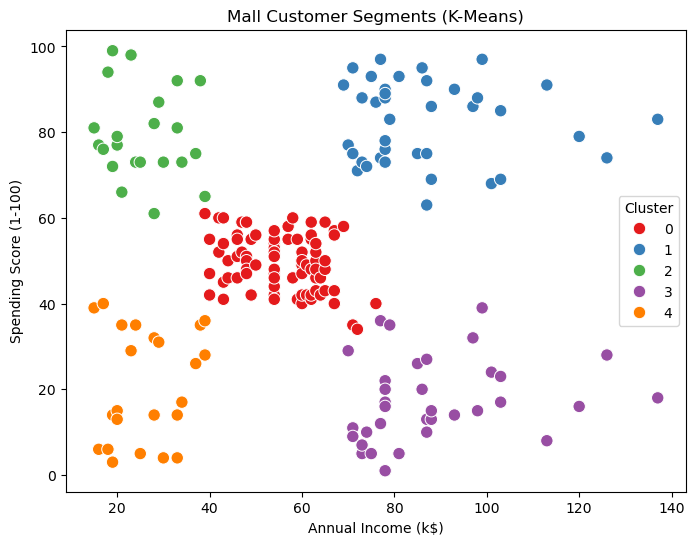

In [8]:
# ---------------------- 8. VISUALIZE THE CLUSTERS ----------------------
# Scatter plot shows customers grouped by cluster.
# Each color represents one of the 5 clusters based on income vs. spending behavior.

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],         # Income on X-axis
    y=df['Spending Score (1-100)'],     # Spending score on Y-axis
    hue=df['Cluster'],                  # Color by assigned cluster
    palette='Set1',
    s=80                                # Size of each point
)
plt.title("Mall Customer Segments (K-Means)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [9]:
# ---------------------- 9. DISPLAY CLUSTER CENTROIDS ----------------------
# Centroids represent the "center" of each cluster.
# Since we scaled the data earlier, we invert the scaling to get original values.

centroids = kmeans.cluster_centers_                    # Get centroids from model
centroids = scaler.inverse_transform(centroids)        # Convert back to original scale

centroid_df = pd.DataFrame(
    centroids,
    columns=['Annual Income (k$)', 'Spending Score (1-100)']
)                                                      # Create a readable table
centroid_df


,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
